Convolution Neural Network:
- used for image processing


4 20 15 100
2 12 110 35
1 4  5   78
3 23 1  8

pooling
- max pooling : gets the max on each samplings
    -  20 100
    -  23 78
- avg pooling : gets average of each samplings
    - 9.5 51.25
    - 7.66 23

padding
마스크 검색


Epoch 1: val_loss improved from inf to 0.05690, saving model to ./model/CNN_Mnist/01=0.0569.keras

Epoch 2: val_loss improved from 0.05690 to 0.03880, saving model to ./model/CNN_Mnist/02=0.0388.keras

Epoch 3: val_loss improved from 0.03880 to 0.03438, saving model to ./model/CNN_Mnist/03=0.0344.keras

Epoch 4: val_loss did not improve from 0.03438

Epoch 5: val_loss improved from 0.03438 to 0.03139, saving model to ./model/CNN_Mnist/05=0.0314.keras

Epoch 6: val_loss improved from 0.03139 to 0.03132, saving model to ./model/CNN_Mnist/06=0.0313.keras

Epoch 7: val_loss improved from 0.03132 to 0.02717, saving model to ./model/CNN_Mnist/07=0.0272.keras

Epoch 8: val_loss did not improve from 0.02717

Epoch 9: val_loss did not improve from 0.02717

Epoch 10: val_loss did not improve from 0.02717

Epoch 11: val_loss did not improve from 0.02717

Epoch 12: val_loss did not improve from 0.02717

Epoch 13: val_loss did not improve from 0.02717

Epoch 14: val_loss did not improve from 0.027

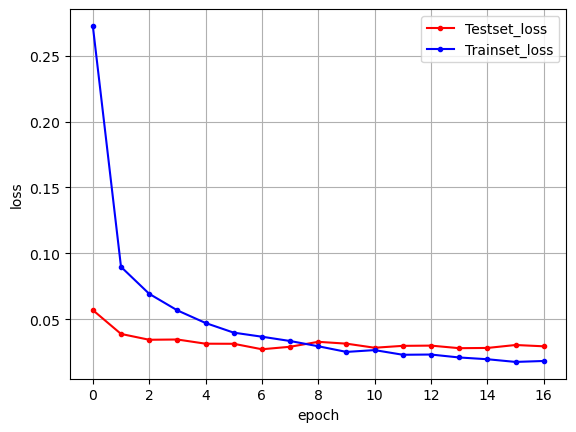

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = Sequential()
#마스크 32개, 마스크 사이즈 3 x 3
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation = 'relu'))
#마스크 64개, 마스크 사이즈 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
#마스크 중에 가장 큰 값만 날려 불필요한 정보 간추리기
model.add(MaxPooling2D(pool_size=2))
#과적합을 피하기 위한 drop out - 임의로 노드 25% 꺼버리는 것
model.add(Dropout(0.25))
#1차원으로 만들기
model.add(Flatten())
#전체 특성 종합
model.add(Dense(128, activation='relu'))
#과적합을 피하기 위한 drop out - 임의로 노드 50% 꺼버리는 것
model.add(Dropout(0.5))
#출력층
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

MODEL_DIR = './model/CNN_Mnist/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/CNN_Mnist/{epoch:02d}={val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" %(model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,599,648 (13.73 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,399,766 (9.15 MB)

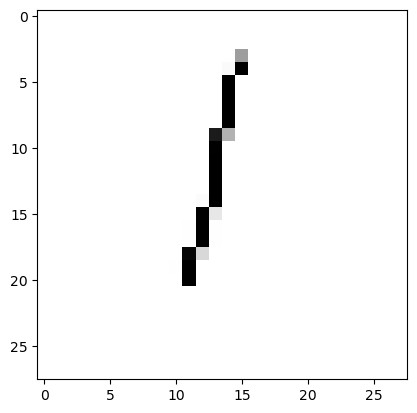

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


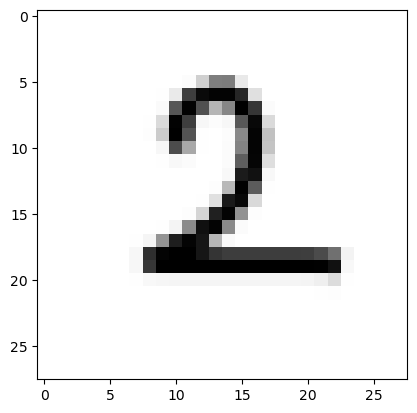

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


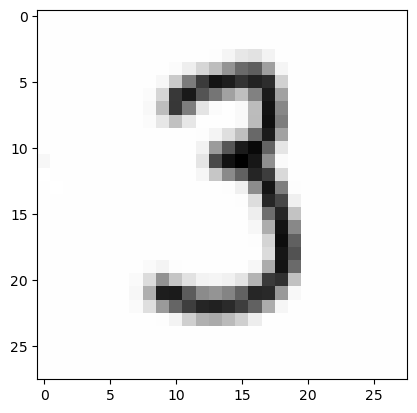

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


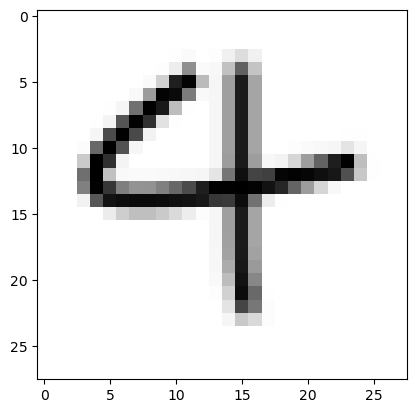

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


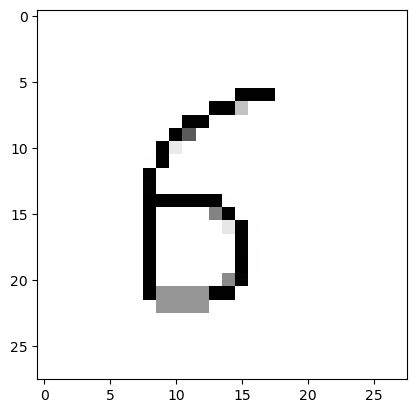

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The Answer 1 is  1
The Answer 2 is  2
The Answer 3 is  3
The Answer 4 is  4
The Answer 6 is  5


In [50]:
# import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import cv2

model = load_model('./model/CNN_Mnist/07=0.0272.keras')

model.summary()
test_num = []
test_predict = list()
test_num.append(cv2.imread(f'./datas/mnist/{1}.jpg'))
test_num.append(cv2.imread(f'./datas/mnist/{2}.jpg'))
test_num.append(cv2.imread(f'./datas/mnist/{3}.jpg'))
test_num.append(cv2.imread(f'./datas/mnist/{4}.jpg'))
test_num.append(cv2.imread(f'./datas/mnist/{6}.jpg'))

for i in range(len(test_num)):
    test_num[i] = cv2.resize(test_num[i], (28, 28))
    test_num[i] = cv2.cvtColor(test_num[i], cv2.COLOR_BGR2GRAY)
    test_num[i] = cv2.bitwise_not(test_num[i])
    plt.imshow(test_num[i], cmap='Greys')
    plt.show()
    test_num[i] = test_num[i].reshape(1, 28, 28, 1).astype('float64')/255
    test_predict.append(model.predict(test_num[i]))

print('The Answer 1 is ', test_predict[0].argmax())
print('The Answer 2 is ', test_predict[1].argmax())
print('The Answer 3 is ', test_predict[2].argmax())
print('The Answer 4 is ', test_predict[3].argmax())
print('The Answer 6 is ', test_predict[4].argmax())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,599,648 (13.73 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,399,766 (9.15 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


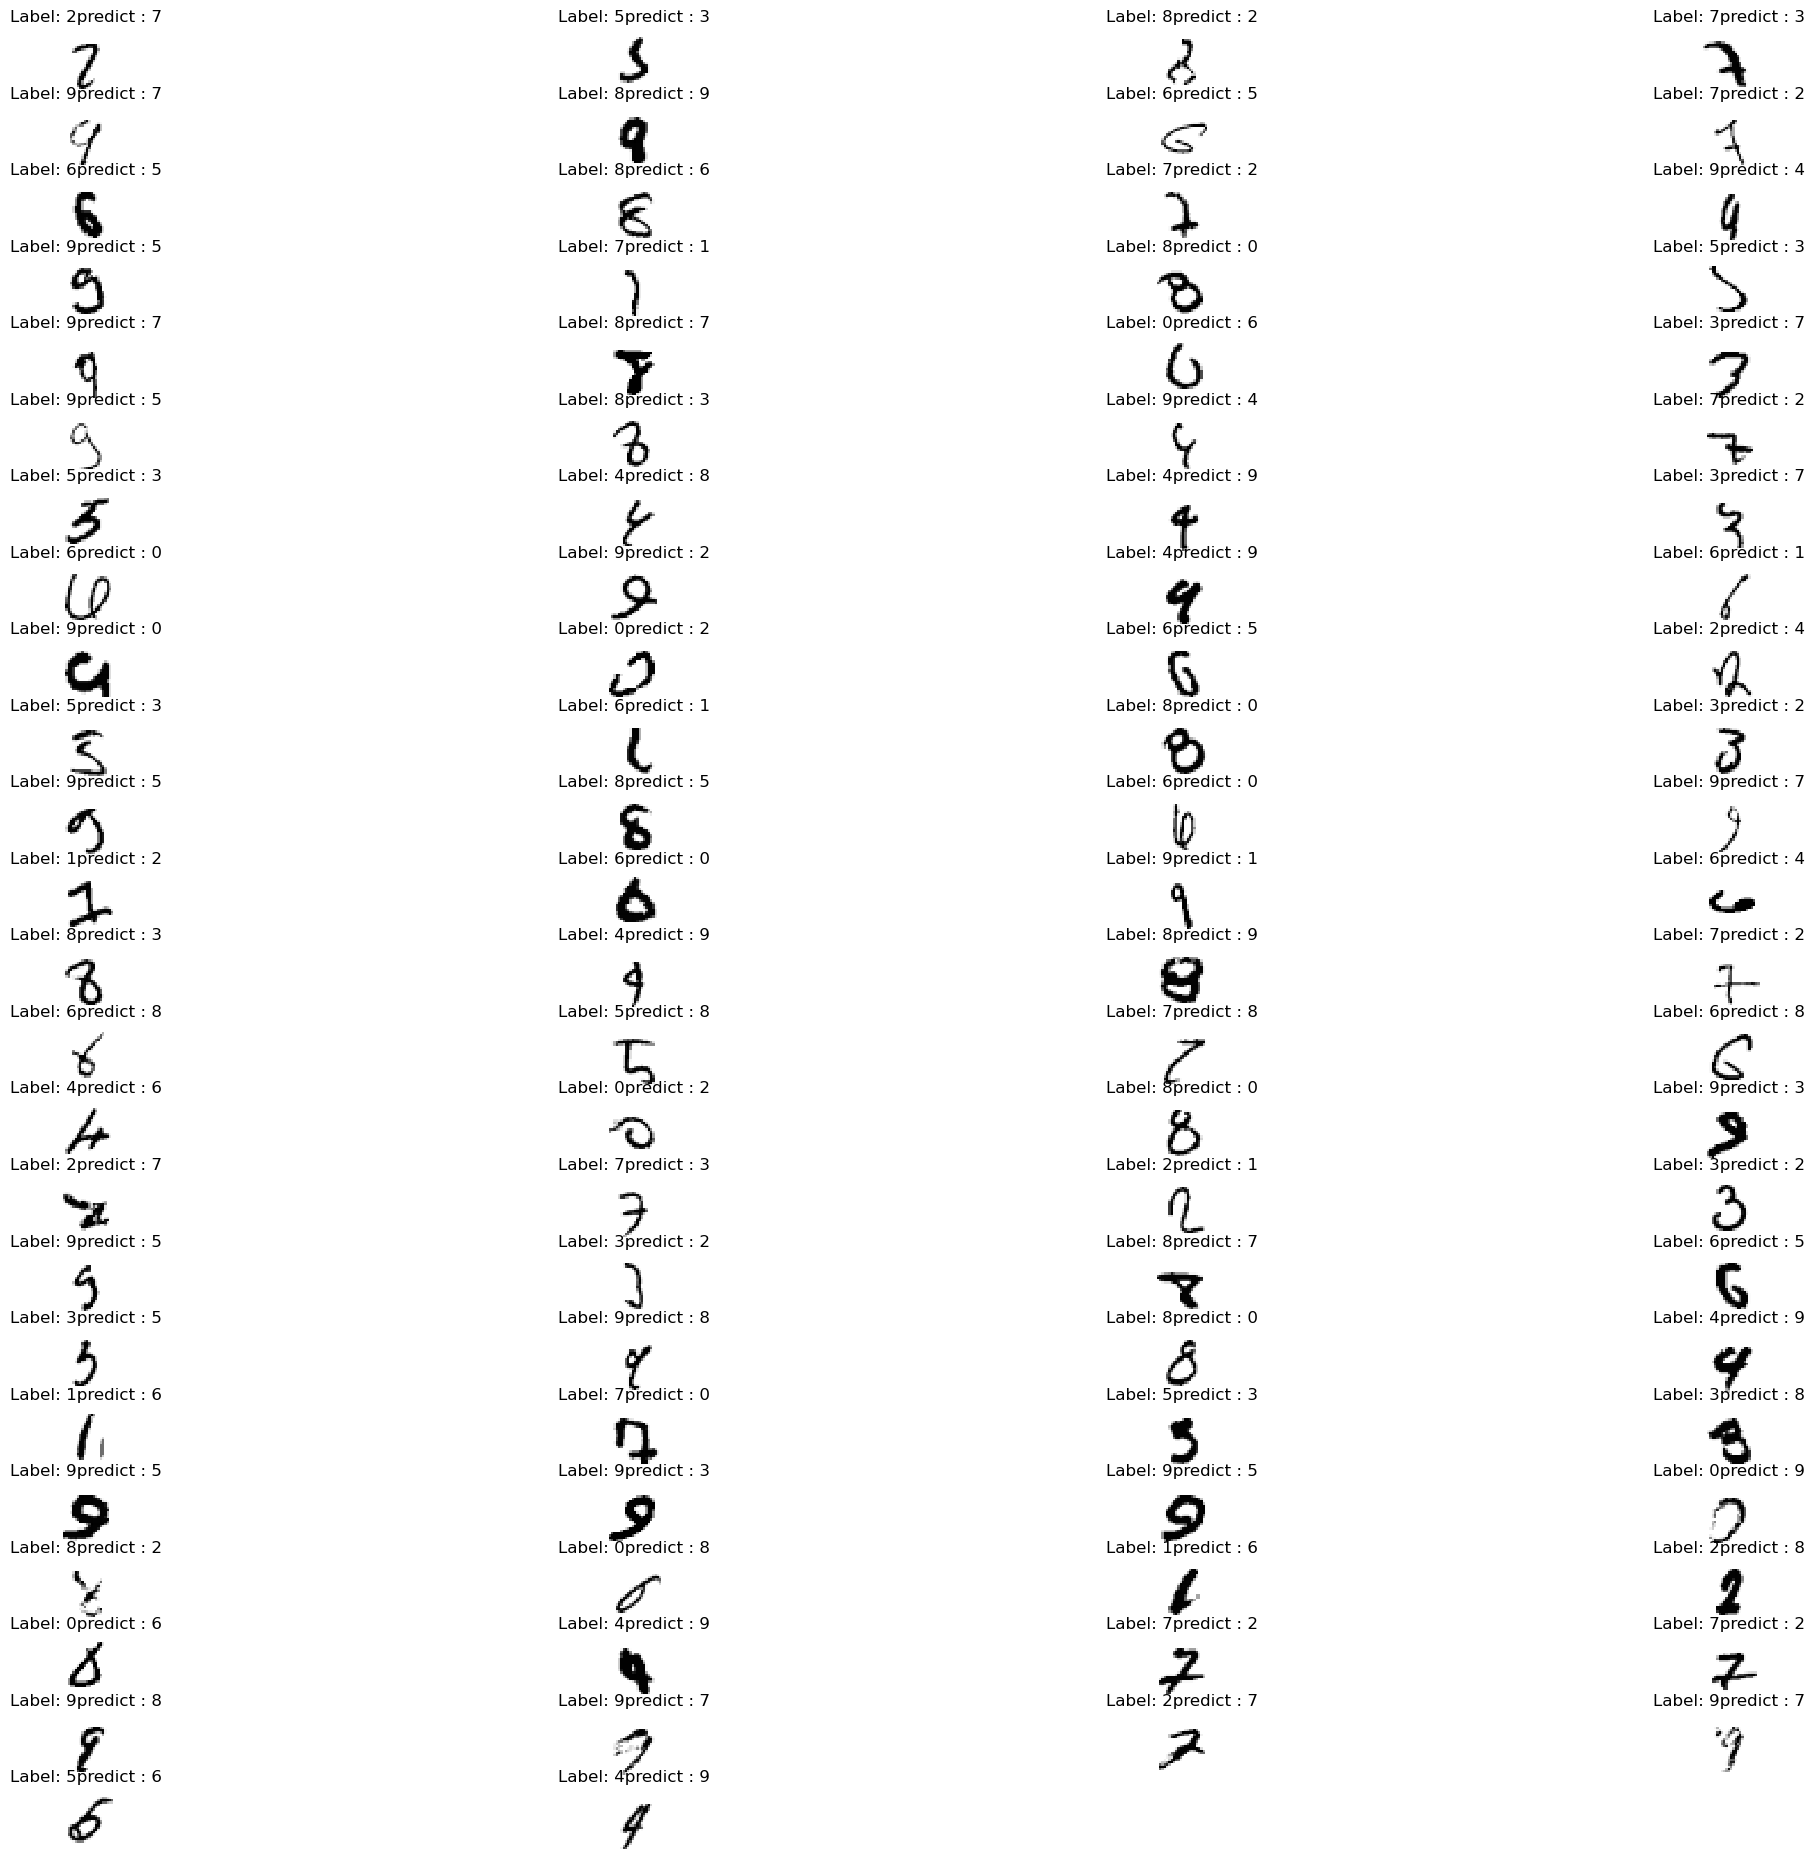

In [53]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist

(x_train, y_class_train), (x_test, y_class_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

model = load_model('./model/CNN_Mnist/07=0.0272.keras')
model.summary()

wrong_result =[]
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

for n in range(0, len(y_class_test)):
    if predicted_labels[n] != y_class_test[n]:
        wrong_result.append(n)
len(wrong_result)

plt.figure(figsize= (14, 12))
for idx, n in enumerate(wrong_result):
    plt.subplot(len(wrong_result)//4+1, 4, idx+1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.52)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label: ' + str(y_class_test[n]) + 'predict : ' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()